<a href="https://colab.research.google.com/github/Aaru235/MLnow_2.0/blob/main/03_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/jackdaoud/animal-shelter-analytics?select=Austin_Animal_Center_Intakes.csv)

**Date Created**: June 11, 2021


**Author**:
 Saloni Jain 

**Reach out**:
[Email](aarushvyas23@gmail.com) | [GitHub](https://github.com/Aaru235) | [LinkedIn](https://www.linkedin.com/in/aarushi-vyass-a43861209/)

[[Course Repository](https://github.com/Aaru235/MLnow_2.0)]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Assessment/Toys'

/content/drive/MyDrive/Assessment/Toys


In [3]:
ls

AnimalShelter_univariate_data.csv  charts.csv
Austin_Animal_Center_Intakes.csv   toy_dataset.csv


In [4]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [5]:
Data = pd.read_csv('Austin_Animal_Center_Intakes.csv')

In [6]:
Data.head(10) #print the first ten rows of the dataframe

,Animal ID,Name,DateTime,MonthYear,Found Location,IntakeType,IntakeCondition,AnimalType,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,1/3/2019 16:19,1/3/2019 16:19,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,7/5/2015 12:59,7/5/2015 12:59,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,4/14/2016 18:43,4/14/2016 18:43,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 7:59,10/21/2013 7:59,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,6/29/2014 10:38,6/29/2014 10:38,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,2/18/2017 12:46,2/18/2017 12:46,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,4/16/2019 9:53,4/16/2019 9:53,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Great Dane Mix,Black
7,A708452,Mumble,7/30/2015 14:37,7/30/2015 14:37,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
8,A818975,NaN,6/18/2020 14:53,6/18/2020 14:53,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby
9,A774147,NaN,6/11/2018 7:45,6/11/2018 7:45,6600 Elm Creek in Austin (TX),Stray,Injured,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Black/White


We are just going to consider the columns Intake Condition and Animal Type for univariate linear regression

$Intake Type = Animal Type  \cdot \theta_1 + \theta_0$

In [7]:
print(f'IntakeType:{Data.IntakeType.unique()}')

IntakeType:['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request'
 'Abandoned']


In [8]:
print(f'AnimalType:{Data.AnimalType.unique()}')

AnimalType:['Dog' 'Cat' 'Other' 'Bird' 'Livestock']


Converting the categorical data to numeric data

In [9]:
Data['AnimalType'] = Data['AnimalType'].apply({'Dog':1, 'Cat':2, 'Other':3,  'Bird':4, 'Livestock':5}.get)

In [10]:
Data['IntakeType'] = Data['IntakeType'].apply({'Stray':1, 'Owner Surrender':2, 'Public Assist':3, 'Wildlife':4, 'Euthanasia Request':5, 'Abandoned':6}.get)

In [12]:
uniData = Data[['AnimalType', 'IntakeType']]
uniData.head(5)

,AnimalType,IntakeType
0,1,1
1,1,1
2,1,1
3,2,1
4,1,1


In [13]:
uniData.to_csv('AnimalShelter_univariate_data.csv')

In [14]:
ls

AnimalShelter_univariate_data.csv  charts.csv
Austin_Animal_Center_Intakes.csv   toy_dataset.csv


##Data visualization

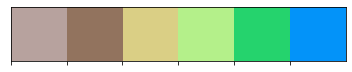

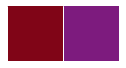

In [15]:
import seaborn as sns
sns.palplot(sns.color_palette("terrain_r")) 
pal = sns.color_palette('terrain_r', 6) #print 6 color shades from terrain_r
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#800517', '#7D1B7E'] #Burgundy and purple hex codes 
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [16]:
uniData.columns #columns in the dataframe

Index(['AnimalType', 'IntakeType'], dtype='object')

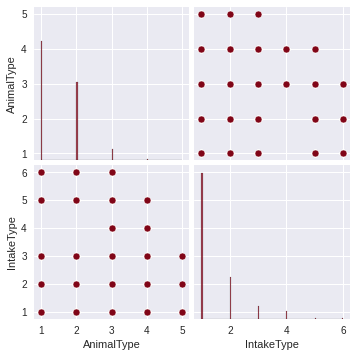

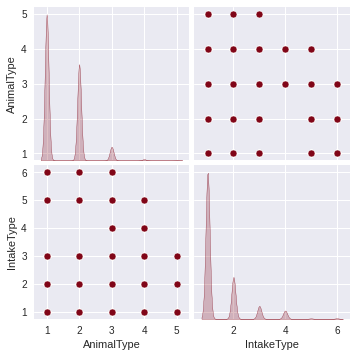

In [17]:
sns.pairplot(uniData,
             x_vars = ['AnimalType', 'IntakeType'],
             y_vars =  ['AnimalType', 'IntakeType'],
       diag_kind='auto'
             )

sns.pairplot(uniData,
             x_vars = ['AnimalType', 'IntakeType'],
             y_vars =  ['AnimalType', 'IntakeType'],
       diag_kind='kde'
             )

##Data Splits

In [18]:
#80-20 train-test percent split

trainDataset = uniData.sample(frac=0.89, random_state=0) 
testDataset = uniData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

        AnimalType  IntakeType
26010            1           3
121439           1           1
7721             2           1
59075            1           1
104938           3           4
    AnimalType  IntakeType
10           2           2
13           1           1
21           1           1
30           2           2
43           1           1


In [19]:
print(trainDataset.shape)
print(testDataset.shape)

(110467, 2)
(13653, 2)


In [20]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

        AnimalType  IntakeType
26010            1           3
121439           1           1
7721             2           1
59075            1           1
104938           3           4
    AnimalType  IntakeType
10           2           2
13           1           1
21           1           1
30           2           2
43           1           1


In [21]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('AnimalType')
testLabels = testFeatures.pop('AnimalType')

print(trainLabels.head())
print(testLabels.head())

26010     1
121439    1
7721      2
59075     1
104938    3
Name: AnimalType, dtype: int64
10    2
13    1
21    1
30    2
43    1
Name: AnimalType, dtype: int64


In [22]:
print(trainFeatures.head())
print(testFeatures.head())

        IntakeType
26010            3
121439           1
7721             1
59075            1
104938           4
    IntakeType
10           2
13           1
21           1
30           2
43           1


In [23]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [24]:
model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']
)

In [25]:
numEpochs=300
history=model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
3453/3453 [==============================] - 5s 1ms/step - loss: 0.5909 - mae: 0.5909 - mse: 0.7521 - val_loss: 0.5089 - val_mae: 0.5089 - val_mse: 0.5190
Epoch 2/300
3453/3453 [==============================] - 4s 1ms/step - loss: 0.5010 - mae: 0.5010 - mse: 0.4904 - val_loss: 0.5040 - val_mae: 0.5040 - val_mse: 0.4926
Epoch 3/300
3453/3453 [==============================] - 4s 1ms/step - loss: 0.4989 - mae: 0.4989 - mse: 0.4813 - val_loss: 0.5030 - val_mae: 0.5030 - val_mse: 0.4912
Epoch 4/300
3453/3453 [==============================] - 4s 1ms/step - loss: 0.4979 - mae: 0.4979 - mse: 0.4838 - val_loss: 0.5027 - val_mae: 0.5027 - val_mse: 0.4986
Epoch 5/300
3453/3453 [==============================] - 4s 1ms/step - loss: 0.4969 - mae: 0.4969 - mse: 0.4949 - val_loss: 0.5013 - val_mae: 0.5013 - val_mse: 0.5109
Epoch 6/300
3453/3453 [==============================] - 4s 1ms/step - loss: 0.4961 - mae: 0.4961 - mse: 0.5109 - val_loss: 0.5007 - val_mae: 0.5007 - val_mse: 0.527

In [26]:
print(history)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


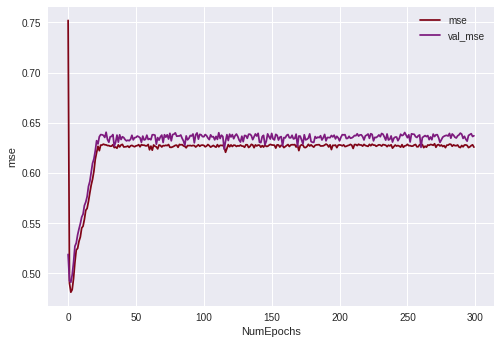

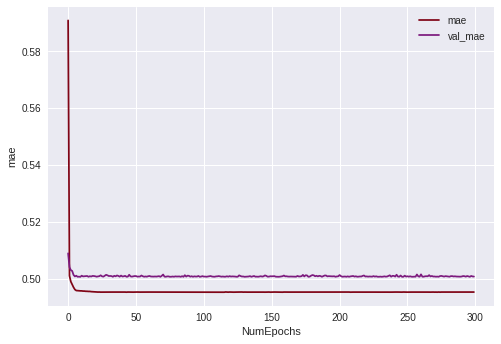

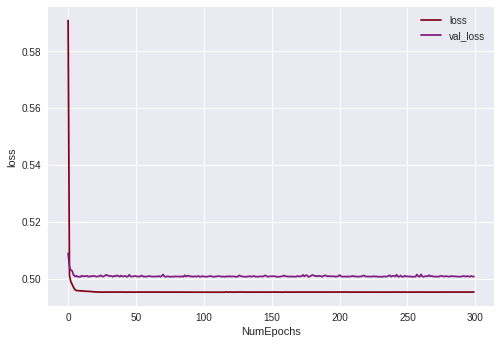

In [28]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [29]:
model.predict([1])

array([[1.0006934]], dtype=float32)

In [30]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0006934]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0006934]
 [1.003616 ]
 [1.0065385]
 [1.0094609]
 [1.0123835]]

List of Predictions (flattened out):
[1.0006934 1.003616  1.0065385 1.0094609 1.0123835]



In [31]:
print(testFeatures)

        IntakeType
10               2
13               1
21               1
30               2
43               1
...            ...
124068           1
124069           1
124079           6
124091           1
124094           1

[13653 rows x 1 columns]


In [32]:
testPreds=model.predict(testFeatures).flatten()
print(testPreds)

[1.003616  1.0006934 1.0006934 ... 1.015306  1.0006934 1.0006934]


In [33]:
print(len(testPreds))
print(testPreds)

13653
[1.003616  1.0006934 1.0006934 ... 1.015306  1.0006934 1.0006934]


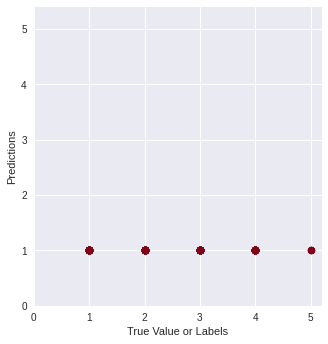

In [34]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)


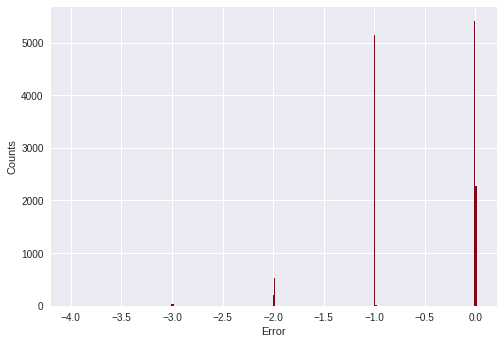

In [37]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note:

Validation loss val_loss is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

Hyperparameter tuning --> numEpochs, optimizer, learning_rate, lossFunctions